## Movie Recommender

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load datasets
titles = pd.read_csv(r'titles.csv')
credits = pd.read_csv(r'credits.csv')

In [3]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [4]:
credits.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [5]:
# describe data
display(titles.info(), '\n\n\n', titles.describe() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

None

'\n\n\n'

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [6]:
display(credits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


None

<AxesSubplot:xlabel='type', ylabel='count'>

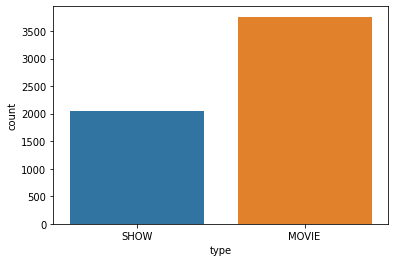

In [7]:
# Type chart
sns.countplot(x='type', data=titles)

In [8]:
# copies of "titles" and "credits"
titles_co = titles.copy()
credits_co = credits.copy()

### Movies

The dataset contains both movies and TV shows. Only movies will be selected.

In [9]:
# selecting only movies 
movies = titles_co[titles_co['type'] == 'MOVIE']
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3759 entries, 1 to 5804
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3759 non-null   object 
 1   title                 3758 non-null   object 
 2   type                  3759 non-null   object 
 3   description           3751 non-null   object 
 4   release_year          3759 non-null   int64  
 5   age_certification     1406 non-null   object 
 6   runtime               3759 non-null   int64  
 7   genres                3759 non-null   object 
 8   production_countries  3759 non-null   object 
 9   seasons               0 non-null      float64
 10  imdb_id               3451 non-null   object 
 11  imdb_score            3407 non-null   float64
 12  imdb_votes            3391 non-null   float64
 13  tmdb_popularity       3698 non-null   float64
 14  tmdb_score            3573 non-null   float64
dtypes: float64(5), int64(

In [10]:
# drop 'season' and 'age_certification' columns
movies = movies.drop(['seasons', 'age_certification'], axis=1)

In [11]:
# drop null title
no_t = movies[movies['title'].isnull()].index
movies = movies.drop(1805, axis=0)
# fill null descriptions
movies['description'] = movies['description'].fillna('None')

In [12]:
movies.isnull().sum()

### Building recommender using TfdfVectorizer

In [ ]:
def conv(x):
    return [x].__str__()
movies['description'] = movies['description'].apply(conv)

In [ ]:
movies['features'] = movies['description'] + ' ' + movies['production_countries'] + ' ' + movies['genres']
movies['features'].head()

1    ['A mentally unstable Vietnam War veteran work...
2    ['King Arthur, accompanied by his squire, recr...
3    ["Brian Cohen is an average young Jewish man, ...
4    ['12-year-old Regan MacNeil begins to adapt an...
6    ["When a madman dubbed 'Scorpio' terrorizes Sa...
Name: features, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()

tfid = vectorizer.fit_transform(movies['features'])


In [ ]:
# Search 
def search(x):
    ind = movies[movies['title'] == x].index[0]
    que = movies.iloc[ind]
    que_l = que['features']
    que_vec = vectorizer.transform([que_l])
    # check for similar movies
    similar = cosine_similarity(que_vec, tfid).flatten()
    indices = np.argpartition(similar, 10)[-10::]
    results = movies.iloc[indices][::-1][['title', 'production_countries', 'description', 'genres']]
    return results

In [ ]:
# List of available movies
mov_list = list(movies['title'].unique())

### Interactive recommender with Ipywidgets

In [ ]:
import ipywidgets as widgets
from IPython.display import display
input_title = widgets.Dropdown(
    options = mov_list,
    value = 'The Exorcist',
    description = 'Title',
    disabled= False
)

movie_list = widgets.Output()

def on_search(data):
    with movie_list:
        movie_list.clear_output()
        title = data['new']
        if title in mov_list:
            display(search(title))


input_title.observe(on_search, names='value')

display(input_title, movie_list)

Dropdown(description='Title', index=3, options=('Taxi Driver', 'Monty Python and the Holy Grail', 'Life of Bri…

Output()